<a href="https://colab.research.google.com/github/kai-ion/Data-602/blob/main/assignment_10_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 9**

In [12]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score

#plotly or other graphing library

In [5]:
# Load datasets here once and assign to variables iris and boston

iris = ds.load_iris()

# Load the Boston dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# Split the raw data into features and target
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

boston = pd.DataFrame(data, columns=[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT'
])


**Q1**

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [6]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
iris_target = iris.target_names.tolist()
print(iris_target)

['setosa', 'versicolor', 'virginica']


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [11]:
# Define the new observations (example values)
new_observations = np.array([[5.0, 3.5, 1.5, 0.2],   # Example observation 1
                              [6.5, 3.0, 5.5, 2.0]])  # Example observation 2

# Create a kNN model with 5 neighbors
knn_model = KNN(n_neighbors=5)

# Fit the model on the entire dataset (or you can split the data if needed)
X = iris.data
y = iris.target
knn_model.fit(X, y)

# Predict the categories for the new observations
predictions = knn_model.predict(new_observations)

# Map the predicted encoded values to the target names
predicted_target_names = iris.target_names[predictions]

# Return the target names of each prediction
predicted_target_names

array(['setosa', 'virginica'], dtype='<U10')

**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

# Create a kNN model with the specified number of neighbors
knn_model = KNN(n_neighbors=5)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy Score: {accuracy:.2f}')

Accuracy Score: 1.00


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

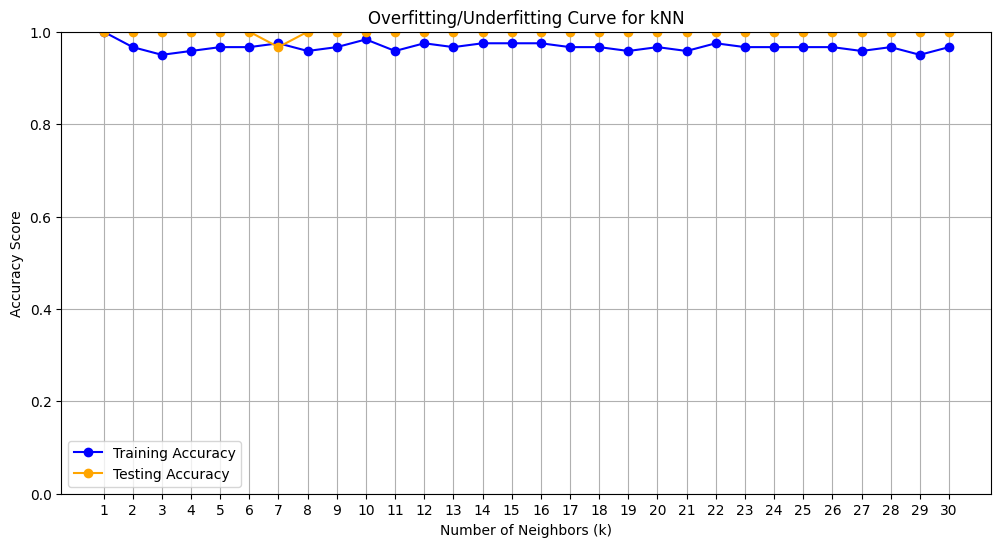

In [16]:
# Lists to hold the accuracy scores
train_accuracy = []
test_accuracy = []

# Calculate accuracy for k values from 1 to 30
k_values = range(1, 31)
for k in k_values:
    knn_model = KNN(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    # Predict on training and testing sets
    train_pred = knn_model.predict(X_train)
    test_pred = knn_model.predict(X_test)

    # Calculate accuracy
    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test, test_pred))

# Plotting the overfitting/underfitting curves
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_accuracy, label='Training Accuracy', color='blue', marker='o')
plt.plot(k_values, test_accuracy, label='Testing Accuracy', color='orange', marker='o')
plt.title('Overfitting/Underfitting Curve for kNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for better visualization
plt.show()